In [2]:
# imports

import pandas as pd
from scipy.stats import chisquare
import numpy as np


In [3]:
results = pd.read_csv('surfperch_results.csv')
results['dataset'] = np.where(results['filepath'].str.contains('Paola'), 'Paola', 'Williams')

In [4]:
[i[9] for i in results.query('(sound == "bioph_grouper_a") and (dataset == "Paola")')['filepath'].str.split("/").to_list()]

['20250314_065200.WAV',
 '20240724_175800.WAV',
 '20240310_044700.WAV',
 '20250627_114825.WAV',
 '20250314_062300.WAV',
 '20240725_055000.WAV',
 '20240310_003900.WAV',
 '20250625_214322.WAV']

In [5]:
results

,Unnamed: 0,filepath,sound,labels,dataset
0,0,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[1 0],Paola
1,1,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[0 1],Paola
2,2,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[1 0],Paola
3,3,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[0 1],Paola
4,4,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[1 0],Paola
...,...,...,...,...,...
12819,12819,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[1 0],Paola
12820,12820,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[0 1],Paola
12821,12821,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[1 0],Paola
12822,12822,/home/a.jajodia.229/acoustic/local_data/coral/...,bioph_cascading_saw,[1 0],Paola


In [6]:
def cs(n, y):
    return chisquare(n, np.sum(n)/np.sum(y) * y)

In [26]:
contingency = pd.crosstab(index=results['sound'], columns=results['labels'], normalize=False)
contingency = contingency.loc[(contingency["[1 0]"] > 30) | (contingency["[0 1]"] > 30)].reset_index()

contingency = contingency.rename(columns={'[1 0]': 'Degraded', '[0 1]': 'Non Degraded'})

cs(contingency['Degraded'], contingency['Non Degraded'])
# cs(contingency['Paola'], contingency['Williams'])

Power_divergenceResult(statistic=np.float64(198.197040353692), pvalue=np.float64(6.903685659371124e-41))

In [27]:
contingency.reset_index()

labels,index,sound,Non Degraded,Degraded
0,0,anthrop,15,35
1,1,bioph,2652,2175
2,2,bioph_cascading_saw,3670,3791
3,3,bioph_damselfish,65,22
4,4,bioph_low_growl,109,20
5,5,bioph_mycbon,48,44


In [9]:
df = contingency.melt(
    id_vars="sound",
    value_vars=['Non Degraded', 'Degraded']
)

/tmp/ipykernel_1848164/3147706692.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")


Text(0, 0.5, 'count')

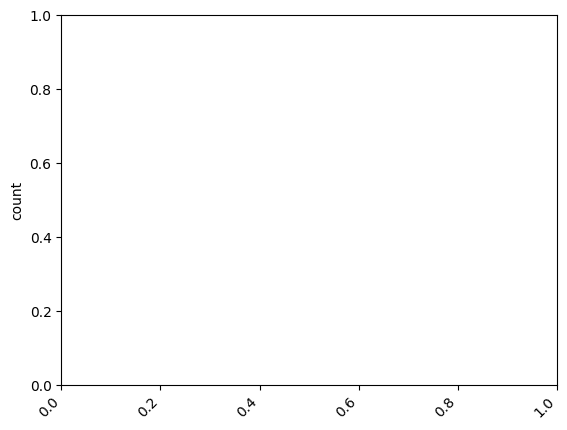

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

fig = sns.barplot(data=df, x='sound', y='value', hue='labels')

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")

fig.set_ylabel('count')